### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : omisego_price.csv 
Name        : Yudi Aditya

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [7]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/omisego_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,8.68,11.28,7.60,10.98,"111,430,000","852,870,000"
1,2017-09-04,10.55,10.55,7.31,8.78,"159,979,000","1,037,440,000"
2,2017-09-03,10.79,11.37,9.64,10.57,"68,616,800","1,060,760,000"
3,2017-09-02,11.99,11.99,9.96,10.80,"93,561,000","1,178,610,000"
4,2017-09-01,11.73,12.52,11.63,11.97,"91,962,400","1,153,390,000"


In [8]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [10]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null object
Market Cap    30 non-null object
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


- The data frame has 30 entries and 6 columns. 
- All columns has 30 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [11]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.

Solution:
- Convert to float number

In [12]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [13]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-09-05 to 2017-08-07
Data columns (total 6 columns):
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null int64
Market Cap    30 non-null int64
dtypes: float64(4), int64(2)
memory usage: 2.9 KB


In [14]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,7.774667,8.550333,7.093667,8.060000,9.095355e+07,7.643136e+08
std,2.364860,2.340497,2.171231,2.222332,5.804909e+07,2.325408e+08
min,2.700000,3.250000,2.630000,3.150000,2.291500e+07,2.651380e+08
25%,6.895000,7.587500,6.182500,7.072500,5.043160e+07,6.782295e+08
50%,8.230000,8.455000,7.325000,8.275000,7.993950e+07,8.092780e+08
75%,8.655000,9.582500,8.122500,8.847500,1.096285e+08,8.504648e+08
max,11.990000,12.520000,11.630000,11.970000,2.346930e+08,1.178610e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [15]:
df1.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

All data is clear

#### 4. Data Visualization

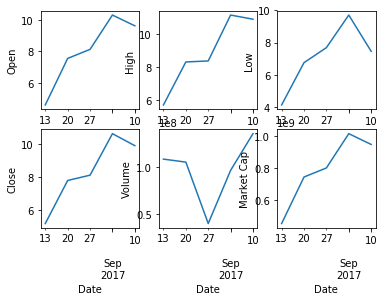

In [17]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()